SIGNATE
https://signate.jp/competitions/1376/submissions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# CSVファイルの指定
train_file_path = 'train.csv'
test_file_path = 'test.csv'

# CSVファイルを読込み
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

# データフレームを辞書型に格納
dfs = {
    "学習データ": df_train,
    "テストデータ": df_test
}

# メイリオフォントの設定
plt.rcParams['font.family'] = 'Meiryo'


In [2]:
def calculate_missing_data(df):
    # 各カラムの欠損値数を計算
    missing_values_count = df.isnull().sum()

    # 各カラムの欠損割合を計算
    missing_values_ratio = (missing_values_count / len(df)) * 100

    # 欠損値がある列のみを抽出
    missing_data = pd.DataFrame({
        'カラム名': missing_values_count.index,
        '欠損値数': missing_values_count.values,
        '欠損割合': missing_values_ratio.values
    })

    # 全体の欠損値数の合計を計算
    total_missing_count = missing_data['欠損値数'].sum()

    # 全体の欠損割合の合計を計算
    total_missing_ratio = missing_data['欠損割合'].mean()

    # 合計の行をデータフレームに追加
    total_row = pd.DataFrame({
        'カラム名': ['合計'],
        '欠損値数': [total_missing_count],
        '欠損割合': [total_missing_ratio]
    })

    # データフレームに合計の行を追加
    missing_data = pd.concat([missing_data, total_row], ignore_index=True)

    return missing_data

# 各データフレームに対して関数を適用
for key, df in dfs.items():
    missing_data = calculate_missing_data(df)
    print(f"\n「{key}」の欠損データ:")
    display(missing_data)


「学習データ」の欠損データ:


,カラム名,欠損値数,欠損割合
0,id,0,0.000000
1,Age,100,2.866151
2,TypeofContact,6,0.171969
3,CityTier,0,0.000000
4,DurationOfPitch,121,3.468042
5,Occupation,0,0.000000
6,Gender,0,0.000000
7,NumberOfPersonVisiting,0,0.000000
8,NumberOfFollowups,33,0.945830
9,ProductPitched,0,0.000000



「テストデータ」の欠損データ:


,カラム名,欠損値数,欠損割合
0,id,0,0.000000
1,Age,93,2.665520
2,TypeofContact,12,0.343938
3,CityTier,0,0.000000
4,DurationOfPitch,131,3.754657
5,Occupation,0,0.000000
6,Gender,0,0.000000
7,NumberOfPersonVisiting,0,0.000000
8,NumberOfFollowups,24,0.687876
9,ProductPitched,0,0.000000


In [3]:
import pandas as pd
import re

# 漢数字からアラビア数字への変換用辞書
kanji_to_num = {
    "一": 1, "二": 2, "三": 3, "四": 4, "五": 5,
    "六": 6, "七": 7, "八": 8, "九": 9, "十": 10,
    "二十": 20, "三十": 30, "四十": 40, "五十": 50, 
    "六十": 60, "七十": 70, "八十": 80, "九十": 90
}

# 漢数字をアラビア数字に変換する関数
def kanji_to_int(kanji_str):
    num = 0
    temp = 0
    for char in kanji_str:
        if char in kanji_to_num:
            temp += kanji_to_num[char]
    return num + temp

# 年齢カラムのクリーニング関数
def clean_age(age):
    if pd.isna(age):
        return None
    age = str(age)
    if re.search(r'[一二三四五六七八九十]', age):
        return kanji_to_int(age)
    age = re.sub(r'[^\d]', '', age)
    return int(age) if age.isdigit() else None

# 年齢カラムのクリーニングを適用する関数
def apply_clean_age(dfs, column_name='Age'):
    for key, df in dfs.items():
        df[column_name] = df[column_name].apply(clean_age)
        print(f"'{key}' の'{column_name}'カラムをクリーニングしました。")
    return dfs

# 年齢カラムのクリーニングを適用
dfs = apply_clean_age(dfs, column_name='Age')


'学習データ' の'Age'カラムをクリーニングしました。
'テストデータ' の'Age'カラムをクリーニングしました。


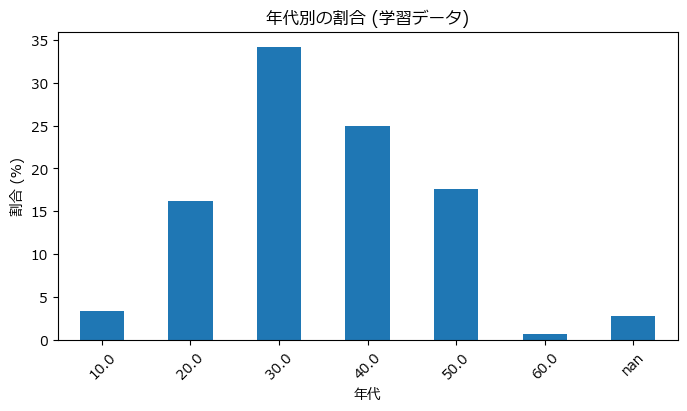

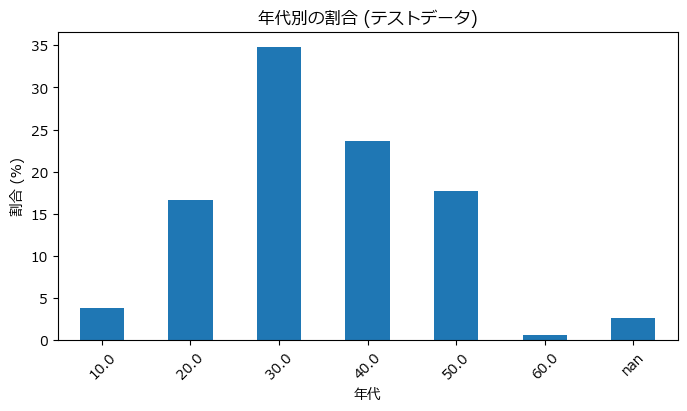

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_age_group_distribution(df, key, age_column='Age'):
    # 年代を計算
    df['AgeGroup'] = df[age_column].apply(lambda x: (x // 10) * 10 if x is not None else None)

    # 年代ごとにデータを集計
    age_group_counts = df['AgeGroup'].value_counts(dropna=False).sort_index()

    # 割合を計算
    total_count = len(df)
    age_group_percentages = (age_group_counts / total_count) * 100

    # 年代順に並べてプロット
    plt.figure(figsize=(8, 4))
    age_group_percentages.plot(kind='bar')
    plt.title(f'年代別の割合 ({key})')
    plt.xlabel('年代')
    plt.ylabel('割合 (%)')
    plt.xticks(rotation=45)
    plt.show()

    return df

def apply_plot_age_group_distribution(dfs, age_column='Age'):
    for key, df in dfs.items():
        dfs[key] = plot_age_group_distribution(df, key=key, age_column=age_column)

    return dfs

# 年代別割合のプロットを適用
dfs = apply_plot_age_group_distribution(dfs, age_column='Age')


In [5]:
import pandas as pd
import re

# 秒・分の表記を秒に変換する関数
def convert_duration(duration):
    if pd.isna(duration):
        return None
    duration = str(duration)
    
    if '秒' in duration:
        seconds = int(re.search(r'(\d+)', duration).group(0))
        return seconds
    
    if '分' in duration:
        minutes = int(re.search(r'(\d+)', duration).group(0))
        return minutes * 60
    
    return None

# データフレームの辞書に対してconvert_durationを適用する関数
def apply_convert_duration(dfs, column_name='DurationOfPitch'):
    for key, df in dfs.items():
        df[column_name] = df[column_name].apply(convert_duration)
    return dfs

# convert_duration関数を適用
dfs = apply_convert_duration(dfs, column_name='DurationOfPitch')


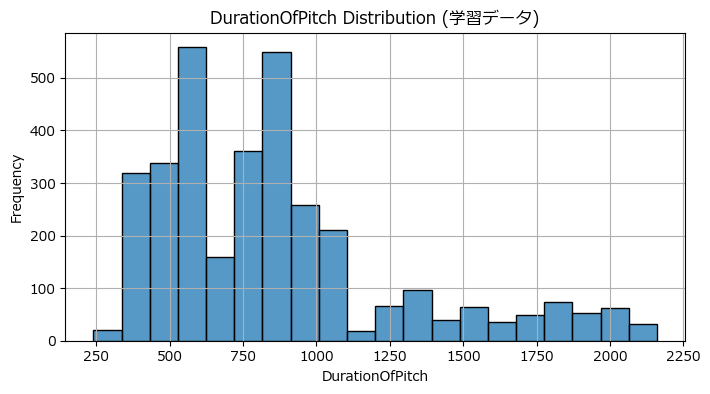

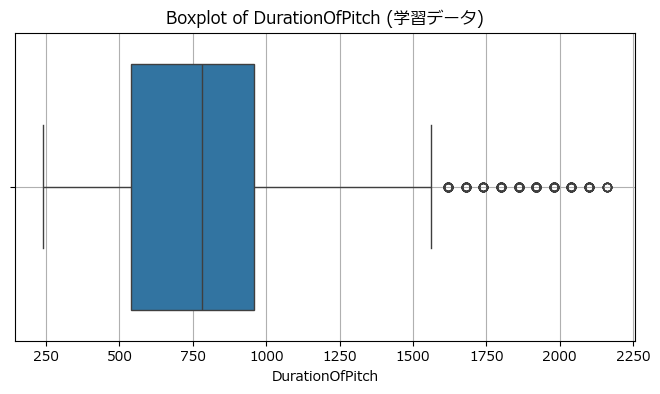

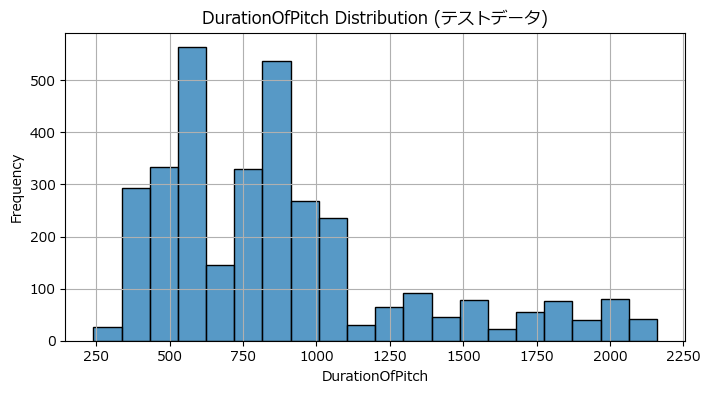

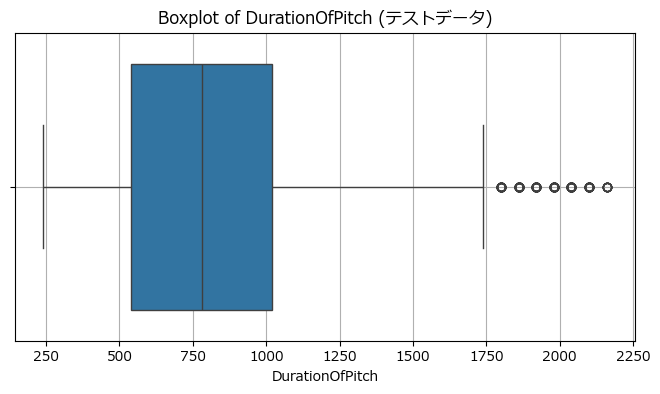

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# ヒストグラムと箱ひげ図をプロットする関数
def plot_histogram_and_boxplot(dfs, column_name):
    for key, df in dfs.items():
        # ヒストグラムのプロット
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column_name].dropna(), bins=20, kde=False)
        plt.title(f'{column_name} Distribution ({key})')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
        # 箱ひげ図のプロット
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column_name].dropna())
        plt.title(f'Boxplot of {column_name} ({key})')
        plt.xlabel(column_name)
        plt.grid(True)
        plt.show()

# ヒストグラムと箱ひげ図のプロットを適用
plot_histogram_and_boxplot(dfs, column_name='DurationOfPitch')


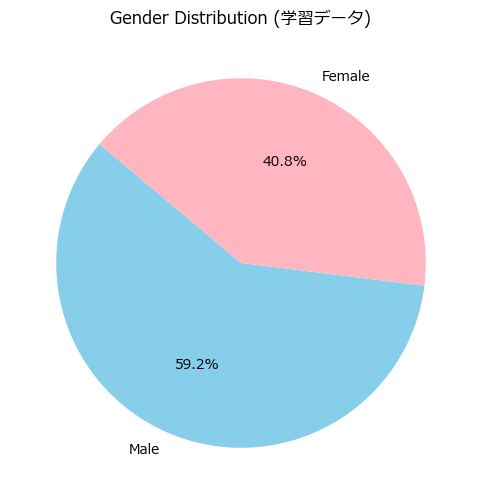

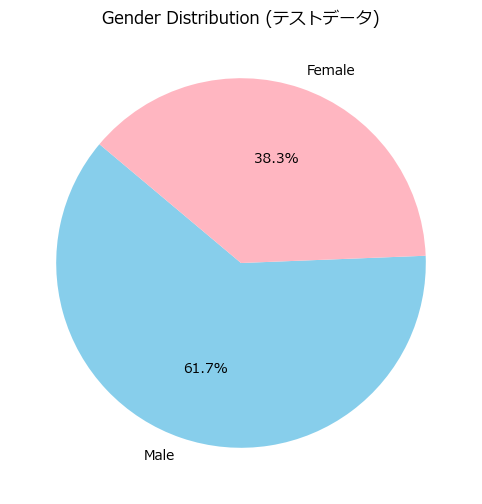

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import re

# 性別を正規化する関数
def normalize_gender(gender):
    if pd.isna(gender):
        return None
    
    gender = unicodedata.normalize('NFKC', gender).lower()
    gender = re.sub(r'\s+', '', gender)
    
    if 'female' in gender:
        return 'Female'
    elif 'male' in gender:
        return 'Male'
    else:
        return None

# 性別の割合を計算し、円グラフをプロットする関数
def plot_gender_distribution(df, key, gender_column='Gender'):
    # 性別を正規化
    df[gender_column] = df[gender_column].apply(normalize_gender)

    # 割合の計算
    gender_counts = df[gender_column].value_counts(normalize=True) * 100

    # 割合のプロット（円グラフ）
    plt.figure(figsize=(8, 6))
    gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=140)
    plt.title(f'Gender Distribution ({key})')
    plt.ylabel('')
    plt.show()

# 複数のデータフレームに対して性別分布のプロットを適用する関数
def apply_plot_gender_distribution(dfs, gender_column='Gender'):
    for key, df in dfs.items():
        plot_gender_distribution(df, key=key, gender_column=gender_column)

# 性別分布のプロットを適用
apply_plot_gender_distribution(dfs, gender_column='Gender')


C:\Users\iriku\AppData\Local\Temp\ipykernel_24740\553849420.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_column, y='Percentage', data=product_counts_df, palette='pastel')


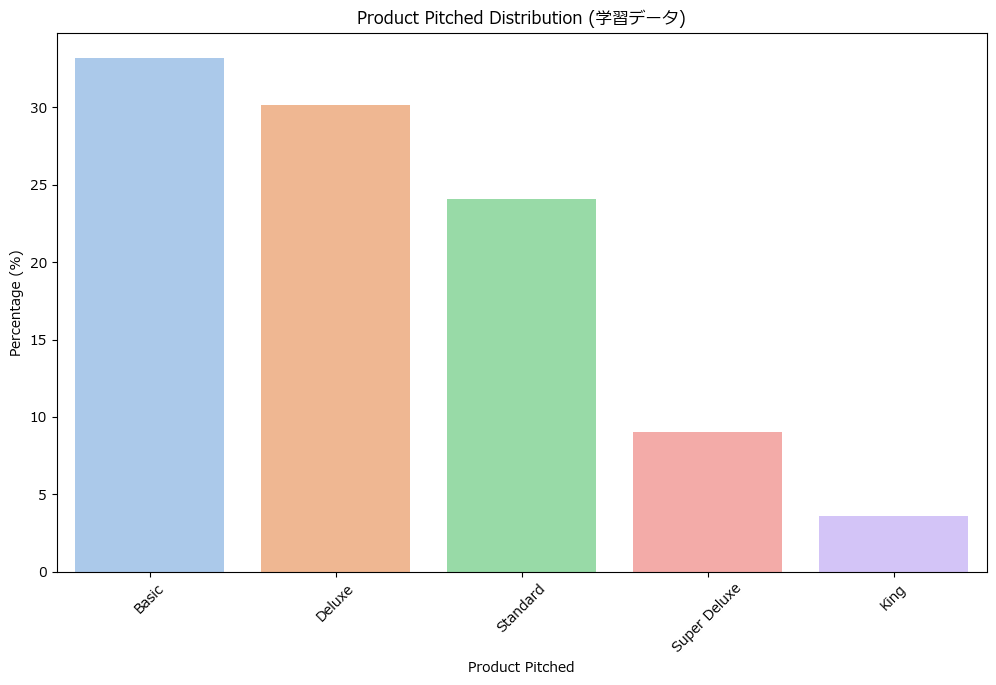

学習データ のユニークな製品名: ['Basic' 'Standard' 'Super Deluxe' 'Deluxe' 'King']


C:\Users\iriku\AppData\Local\Temp\ipykernel_24740\553849420.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_column, y='Percentage', data=product_counts_df, palette='pastel')


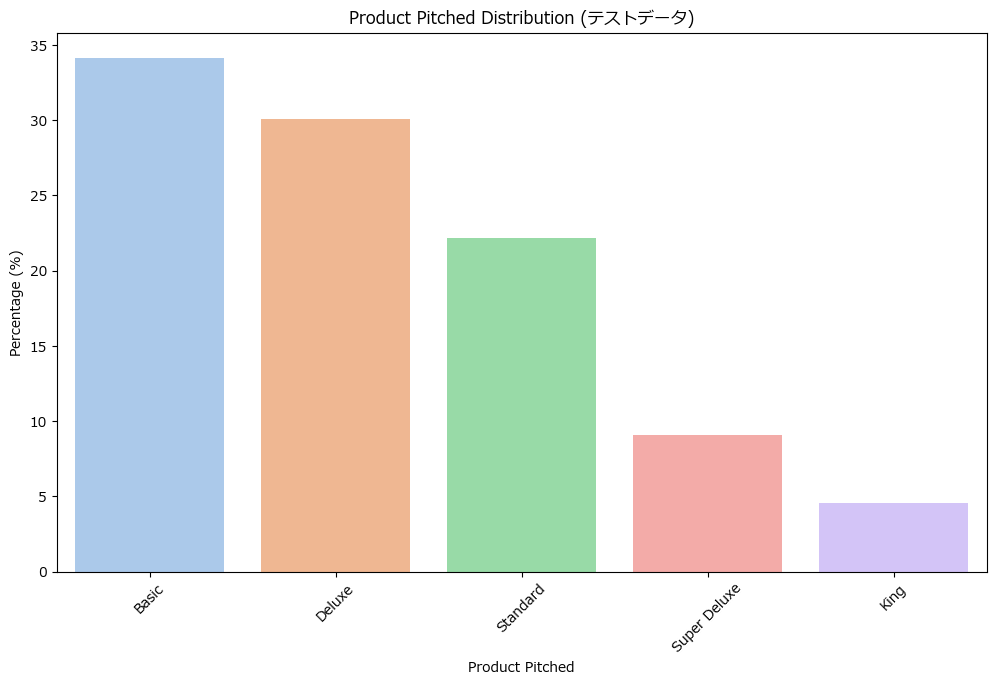

テストデータ のユニークな製品名: ['Super Deluxe' 'Standard' 'Basic' 'Deluxe' 'King']


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import re

# 製品名を正規化する関数
def enhanced_normalize_product_name(product):
    if pd.isna(product):
        return None
    
    # 全角文字を半角文字に変換し、全てを小文字にする
    product = unicodedata.normalize('NFKC', product).lower()
    
    # 余分なスペースや特殊文字を削除
    product = re.sub(r'[^a-z\s]', '', product)
    product = re.sub(r'\s+', ' ', product).strip()
    
    # より詳細なパターンマッチング
    if re.search(r'(basic|basi|baic|basc|bas|asic|bsic|asi|asc)', product):
        return 'Basic'
    elif re.search(r'(standard|stanard|stadard|standar|tandard|stn|stndard)', product):
        return 'Standard'
    elif re.search(r'(super\s*deluxe|super\s*deuxe|super\s*eluxe|super\s*dluxe)', product):
        return 'Super Deluxe'
    elif re.search(r'(deluxe|delux|eluxe|deuxe|deue|delue|dlux|euxe)', product):
        return 'Deluxe'
    elif re.search(r'(king|kng|kg|kig)', product):
        return 'King'
    else:
        return None

# 製品名の正規化と分布のプロットを行う関数
def plot_product_distribution(df, key, product_column='ProductPitched'):
    # 製品名の正規化
    df[product_column] = df[product_column].apply(enhanced_normalize_product_name)

    # 割合の計算
    product_counts = df[product_column].value_counts(dropna=False, normalize=True) * 100
    product_counts_df = product_counts.reset_index()
    product_counts_df.columns = [product_column, 'Percentage']

    # 割合をseabornでプロット
    plt.figure(figsize=(12, 7))
    sns.barplot(x=product_column, y='Percentage', data=product_counts_df, palette='pastel')
    plt.title(f'Product Pitched Distribution ({key})')
    plt.xlabel('Product Pitched')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()

    # ユニークな製品名を取得
    unique_products = df[product_column].unique()
    print(f"{key} のユニークな製品名: {unique_products}")

# 複数のデータフレームに対して製品分布のプロットを適用する関数
def apply_plot_product_distribution(dfs, product_column='ProductPitched'):
    for key, df in dfs.items():
        plot_product_distribution(df, key=key, product_column=product_column)

# 製品分布のプロットを適用
apply_plot_product_distribution(dfs, product_column='ProductPitched')


In [9]:
import pandas as pd
import re

# 日本語表現を数値に変換する関数
def convert_trips(trips):
    if pd.isna(trips):
        return None
    
    trips = str(trips).strip()

    # 年にX回のパターン
    if re.match(r'年に(\d+)回', trips):
        return int(re.match(r'年に(\d+)回', trips).group(1))
    
    # 半年にX回のパターン
    if re.match(r'半年に(\d+)回', trips):
        return int(re.match(r'半年に(\d+)回', trips).group(1)) * 2
    
    # 四半期にX回のパターン
    if re.match(r'四半期に(\d+)回', trips):
        return int(re.match(r'四半期に(\d+)回', trips).group(1)) * 4
    
    # 数値がそのままのケース
    if trips.isdigit():
        return int(trips)
    
    return trips

# カラムを変換し、結果を表示する関数
def apply_convert_trips(dfs, trips_column='NumberOfTrips'):
    for key, df in dfs.items():
        df[trips_column] = df[trips_column].apply(convert_trips)
        print(f"'{key}' の統一後の'{trips_column}'のユニークな値:")
        print(df[trips_column].unique())

# カラム変換の処理を適用
apply_convert_trips(dfs, trips_column='NumberOfTrips')


'学習データ' の統一後の'NumberOfTrips'のユニークな値:
[ 5.  2.  4.  1.  6.  3.  7.  8. nan]
'テストデータ' の統一後の'NumberOfTrips'のユニークな値:
[ 7.  4.  1.  6.  5.  3.  2. nan  8.]


In [10]:
import pandas as pd

# パスポートカラムをカテゴリカルデータに変換する関数
def convert_passport_column(df, passport_column='Passport'):
    # カテゴリカルデータに変換
    df[passport_column] = df[passport_column].map({0: 'No', 1: 'Yes'})
    
    # 結果を表示
    print(f"変換後の'{passport_column}'のユニークな値:")
    print(df[passport_column].unique())

# 複数のデータフレームに対してパスポートカラムの変換を適用する関数
def apply_convert_passport(dfs, passport_column='Passport'):
    for key, df in dfs.items():
        print(f"'{key}' の'{passport_column}'カラムを変換します。")
        convert_passport_column(df, passport_column=passport_column)

# パスポートカラムの変換を適用
apply_convert_passport(dfs, passport_column='Passport')


'学習データ' の'Passport'カラムを変換します。
変換後の'Passport'のユニークな値:
['Yes' 'No']
'テストデータ' の'Passport'カラムを変換します。
変換後の'Passport'のユニークな値:
['No' 'Yes']


'学習データ' の'Designation'カラムを変換します。
'学習データ' の統一後の'Designation'のユニークな値:
['Executive' 'Senior Manager' 'AVP' 'Manager' 'VP']


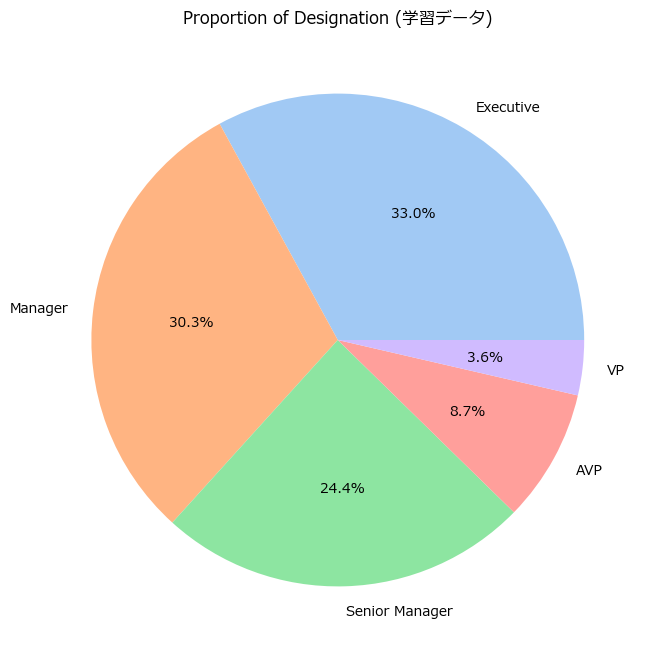

'テストデータ' の'Designation'カラムを変換します。
'テストデータ' の統一後の'Designation'のユニークな値:
['AVP' 'Senior Manager' 'Executive' 'Manager' 'VP']


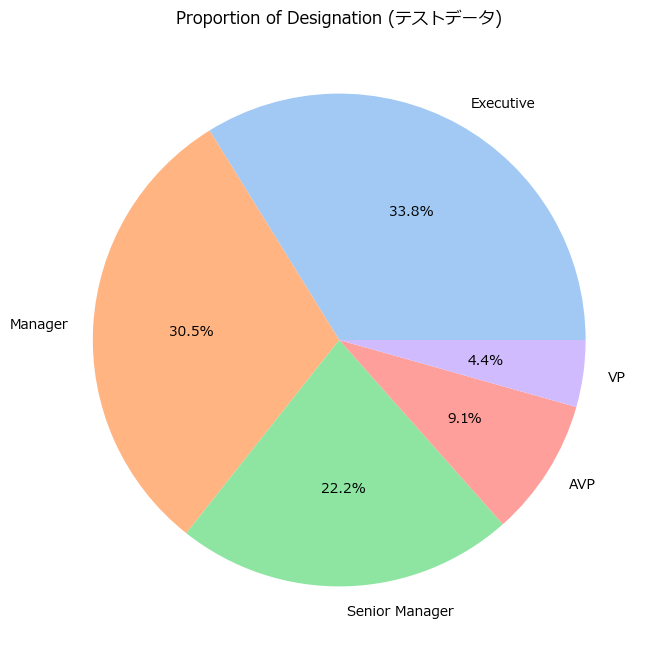

In [11]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata

# 特殊文字を標準アルファベットに変換する関数
def replace_special_characters(text):
    replacements = {
        # ここに置換マッピングを記載
        'Μ': 'M', 'Α': 'A', 'Β': 'B', 'Е': 'E', 'Н': 'H', 'Р': 'P', 'Τ': 'T',
        'Ο': 'O', 'С': 'C', 'Ρ': 'P', 'Ѕ': 'S', 'ѵ': 'v', 'е': 'e', 'ｕ': 'u',
        'ℳ': 'M', 'Χ': 'X', 'І': 'I', 'Κ': 'K', 'Η': 'H', 'Ζ': 'Z', '𝙧': 'r',
        '𝙩': 't', '𝙫': 'v', '𝚏': 'f', '𝚑': 'h', '𝘤': 'c', 'ｅ': 'e', 'Ｖ': 'V',
        'Ｅ': 'E', 'Ⅽ': 'C', 'Ｘ': 'X', 'Ｒ': 'R', 'Ⲅ': 'G', 'Ⲇ': 'D', 'ⲇ': 'D',
        'Ⲉ': 'E', 'ⲉ': 'e', 'Ⲋ': 'S', 'ⲋ': 'S', 'Ⲍ': 'Z', 'ⲍ': 'z', 'Ⲏ': 'H',
        'ⲏ': 'n', 'Ⲑ': 'T', 'ⲑ': 'th', 'Ⲓ': 'I', 'ⲓ': 'i', 'Ⲕ': 'K', 'ⲕ': 'k',
        'Ⲗ': 'L', 'ⲗ': 'l', 'Ⲙ': 'M', 'ⲙ': 'm', 'Ⲛ': 'N', 'ⲛ': 'n', 'Ⲝ': 'ks',
        'ⲝ': 'ks', 'Ⲟ': 'O', 'ⲟ': 'o', 'Ⲡ': 'P', 'ⲡ': 'p', 'Ⲣ': 'R', 'ⲣ': 'r',
        'Ⲥ': 'S', 'ⲥ': 's', 'Ⲧ': 'T', 'ⲧ': 't', 'Ⲩ': 'Y', 'ⲩ': 'y', 'Ⲫ': 'Ph',
        'ⲫ': 'ph', 'Ⲭ': 'Kh', 'ⲭ': 'kh', 'Ⲯ': 'Ps', 'ⲯ': 'ps', 'Ⲱ': 'O',
        'ⲱ': 'o', 'Ⲳ': 'O', 'ⲳ': 'o', 'Ⲵ': 'O', 'ⲵ': 'o', 'Ⲷ': 'G', 'ⲷ': 'g',
        'Ⲹ': 'G', 'ⲹ': 'g', 'Ⲻ': 'G', 'ⲻ': 'g', 'Ⲽ': 'G', 'ⲽ': 'g', 'Ⲿ': 'D',
        'ⲿ': 'd', '×': 'x', 'α': 'a', '𝙧': 'r', '𝙧': 'r', '𝙧': 'r', '𝙧': 'r',
        '𝙧': 'r', '𝙧': 'r', '𝙧': 'r', '𝙧': 'r', '𝙧': 'r'
    }
    for original, replacement in replacements.items():
        text = text.replace(original, replacement)
    return text

# 文字列を正規化して統一する関数
def normalize_designation(original_designation):
    if pd.isna(original_designation):
        return None
    
    # ステップ 1: 特殊文字の置換
    normalized_designation = replace_special_characters(original_designation)
    
    # ステップ 2: 文字列の正規化（全角を半角に、特殊文字を標準文字に）
    normalized_designation = unicodedata.normalize('NFKC', normalized_designation).lower()
    
    # 余分なスペースや特殊文字を削除
    normalized_designation = re.sub(r'[^a-z\s]', '', normalized_designation).strip()
    
    # ステップ 3: 一貫した名前にマッピング
    if re.search(r'executive', normalized_designation):
        return 'Executive'
    elif re.search(r'senior\s*manager', normalized_designation):
        return 'Senior Manager'
    elif re.search(r'avp', normalized_designation):
        return 'AVP'
    elif re.search(r'vp', normalized_designation):
        return 'VP'
    elif re.search(r'manager', normalized_designation):
        return 'Manager'
    else:
        return None

# データフレームに適用する関数
def apply_normalize_designation(dfs, designation_column='Designation'):
    for key, df in dfs.items():
        print(f"'{key}' の'{designation_column}'カラムを変換します。")
        df[designation_column] = df[designation_column].apply(normalize_designation)
        print(f"'{key}' の統一後の'{designation_column}'のユニークな値:")
        print(df[designation_column].unique())
        
        # 円グラフの描画
        plt.figure(figsize=(8, 8))
        df[designation_column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
        plt.title(f'Proportion of {designation_column} ({key})')
        plt.ylabel('')
        plt.show()

# データフレームに対して適用
apply_normalize_designation(dfs, designation_column='Designation')


'学習データ' の'MonthlyIncome'カラムを変換します。


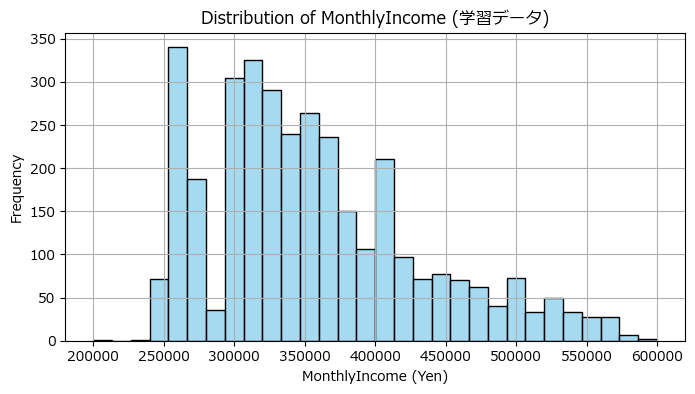

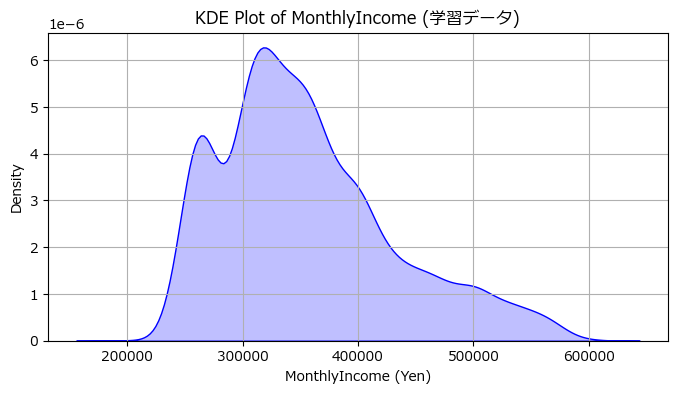

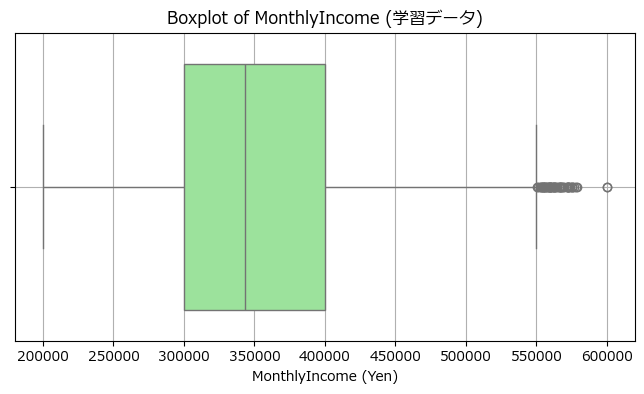

'テストデータ' の'MonthlyIncome'カラムを変換します。


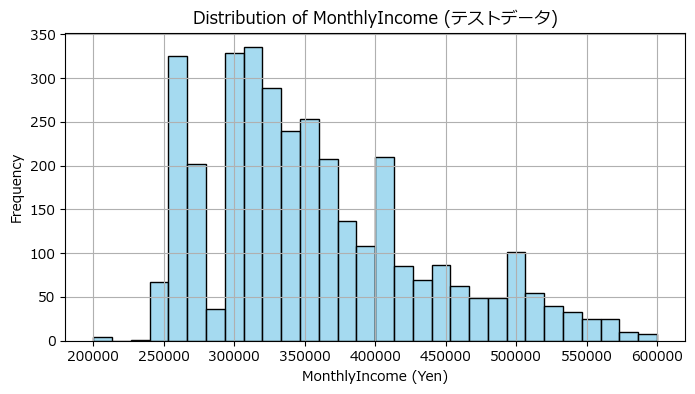

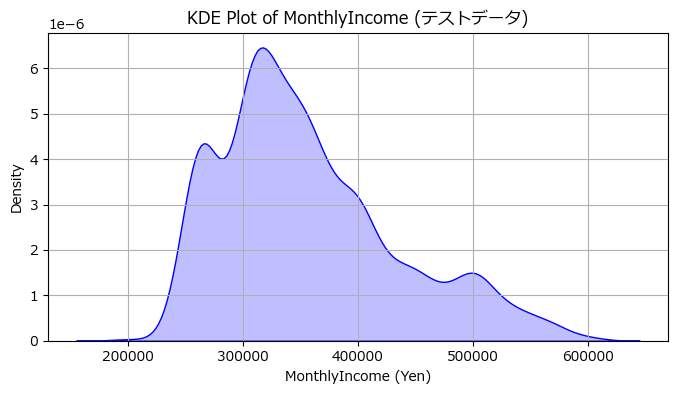

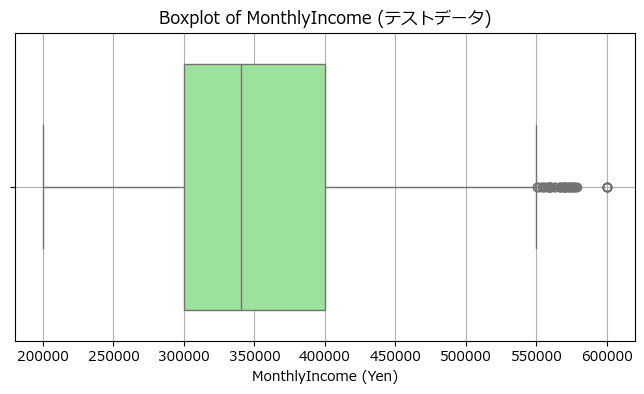

In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 月収XX.X万円の形式を数値に変換する関数
def convert_monthly_income(income):
    if pd.isna(income):
        return None
    
    income_str = str(income)
    
    # 「月収XX.X万円」の形式を検出し、数値に変換
    match = re.match(r'月収(\d+\.\d+)万円', income_str)
    if match:
        yen_value = float(match.group(1)) * 10000  # 万円を円に変換
        return yen_value
    
    # すでに数値形式の場合はそのまま返す
    try:
        return float(income_str)
    except ValueError:
        return None

# 月収の変換とプロットを行う関数
def apply_convert_and_plot_income(dfs, income_column='MonthlyIncome'):
    for key, df in dfs.items():
        print(f"'{key}' の'{income_column}'カラムを変換します。")
        df[income_column] = df[income_column].apply(convert_monthly_income)
        
        # ヒストグラムのプロット
        plt.figure(figsize=(8, 4))
        sns.histplot(df[income_column], bins=30, kde=False, color='skyblue')
        plt.title(f'Distribution of {income_column} ({key})')
        plt.xlabel(f'{income_column} (Yen)')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

        # KDEプロットのプロット
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df[income_column], color='blue', fill=True)
        plt.title(f'KDE Plot of {income_column} ({key})')
        plt.xlabel(f'{income_column} (Yen)')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()

        # 箱ひげ図のプロット
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[income_column], color='lightgreen')
        plt.title(f'Boxplot of {income_column} ({key})')
        plt.xlabel(f'{income_column} (Yen)')
        plt.grid(True)
        plt.show()

# 月収カラムの変換とプロットを適用
apply_convert_and_plot_income(dfs, income_column='MonthlyIncome')


In [13]:
import pandas as pd
import re

# 顧客情報を分割する関数
def split_customer_info_v3(info):
    # 区切り文字で標準化してカンマに置換
    parts = [part.strip() for part in info.replace('\t', ',').replace('\n', ',').replace('／', '/').replace('/', ',').replace('、', ',').replace('，', ',').replace('　', ',').replace(' ', ',').split(',')]
    
    # 各部分を確認し、それぞれのカラムに割り当てる
    marriage_status = None
    car_ownership = None
    children_status = None
    
    for part in parts:
        if re.search(r'(未婚|結婚|離婚|独身)', part):
            marriage_status = part
        elif re.search(r'(車|くるま)', part):
            car_ownership = part
        elif re.search(r'(子供|無子|ゼロ|児|子ども|こども|子)', part):
            children_status = part
    
    return marriage_status, car_ownership, children_status

# 顧客情報の分割をデータフレームに適用する関数
def apply_split_customer_info(dfs, info_column='customer_info'):
    for key, df in dfs.items():
        print(f"'{key}' の'{info_column}'カラムに分割を適用します。")
        df[['MarriageStatus', 'CarOwnership', 'ChildrenStatus']] = df[info_column].apply(split_customer_info_v3).apply(pd.Series)

# 顧客情報の分割を適用
apply_split_customer_info(dfs, info_column='customer_info')


'学習データ' の'customer_info'カラムに分割を適用します。
'テストデータ' の'customer_info'カラムに分割を適用します。


In [14]:
# 各データフレームに対して関数を適用
for key, df in dfs.items():
    missing_data = calculate_missing_data(df)
    print(f"\n「{key}」の欠損データ:")
    display(missing_data)


「学習データ」の欠損データ:


,カラム名,欠損値数,欠損割合
0,id,0,0.000000
1,Age,100,2.866151
2,TypeofContact,6,0.171969
3,CityTier,0,0.000000
4,DurationOfPitch,121,3.468042
5,Occupation,0,0.000000
6,Gender,0,0.000000
7,NumberOfPersonVisiting,0,0.000000
8,NumberOfFollowups,33,0.945830
9,ProductPitched,0,0.000000



「テストデータ」の欠損データ:


,カラム名,欠損値数,欠損割合
0,id,0,0.000000
1,Age,93,2.665520
2,TypeofContact,12,0.343938
3,CityTier,0,0.000000
4,DurationOfPitch,131,3.754657
5,Occupation,0,0.000000
6,Gender,0,0.000000
7,NumberOfPersonVisiting,0,0.000000
8,NumberOfFollowups,24,0.687876
9,ProductPitched,0,0.000000


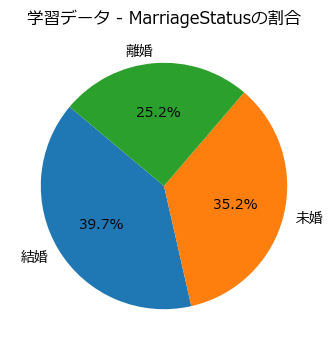

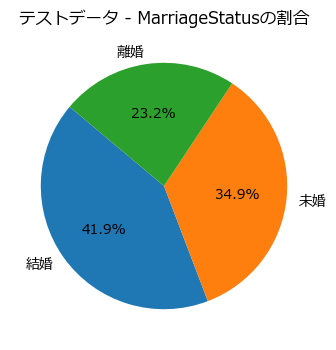

In [15]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# MarriageStatusのカラムに対して複合情報を整理する関数を定義
def clean_marriage_status(status):
    # 正規表現を使って判定
    if re.search(r'(未婚|独身)', status):
        return '未婚'
    elif re.search(r'結婚', status):
        return '結婚'
    elif re.search(r'離婚', status):
        return '離婚'
    # どれにも該当しない場合はNoneを返す
    return None

# 定義した関数を適用してデータを整理
for key, df in dfs.items():
    df['MarriageStatus'] = df['MarriageStatus'].apply(clean_marriage_status)

    # データのカウント (Noneを含める)
    counts = df['MarriageStatus'].value_counts(dropna=False)

    # 円グラフの作成
    plt.figure(figsize=(8, 4))
    labels = [str(label) if pd.notna(label) else '不明' for label in counts.index]
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'{key} - MarriageStatusの割合')
    plt.show()


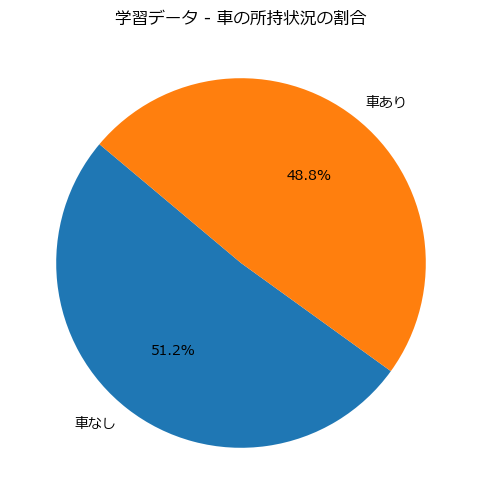

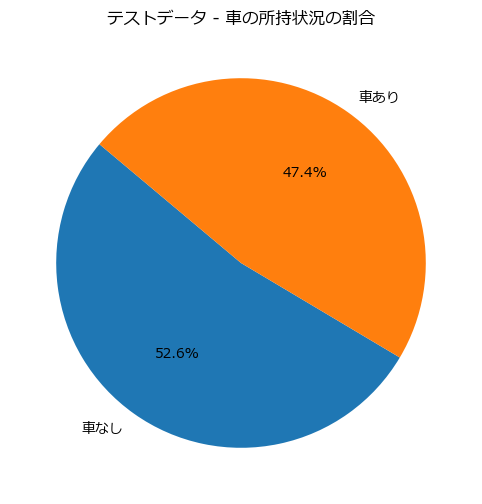

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 自動車所有状況を「車あり」または「車なし」に統一する関数を定義
def map_car_ownership(status):
    # NaN を検出して None に変換
    if pd.isna(status):
        return None
    # None の場合はそのまま None を返す
    if status is None:
        return None
    # 正規表現による判定
    elif re.search(r'(なし|未所持|未所有|非保有)', status):
        return '車なし'
    elif re.search(r'(あり|所持|保有|所有)', status):
        return '車あり'
    # 該当しない場合は None を返す
    return None

# 関数を適用してデータを変換
for key, df in dfs.items():
    df['CarOwnership'] = df['CarOwnership'].apply(map_car_ownership)

    # データのカウント (Noneを含める)
    counts = df['CarOwnership'].value_counts(dropna=False)

    # 円グラフの作成
    plt.figure(figsize=(8, 6))
    labels = [str(label) if pd.notna(label) else '不明' for label in counts.index]
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'{key} - 車の所持状況の割合')
    plt.show()


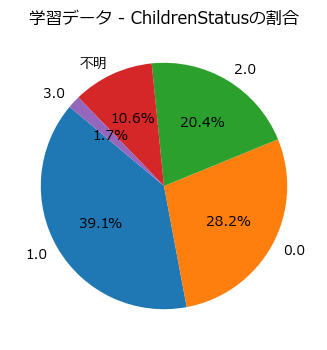

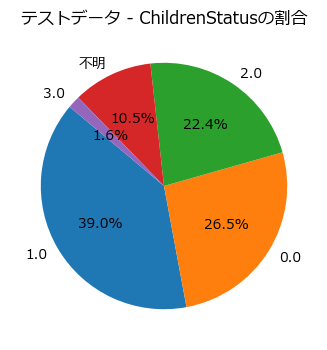

In [17]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# 子供同伴有無を数値に変換する関数
def convert_children_status(status):
    if status is None:
        return None
    if re.search(r'(なし|無|非|ゼロ)', status):
        return 0
    elif re.search(r'(子供|こども)', status):
        # 子供の人数を正規表現で抽出
        match = re.search(r'(\d+)', status)
        if match:
            return int(match.group(1))
    elif re.search(r'(不明|不詳|わからない)', status):
        return None
    return None

# 関数を適用してデータを変換
for key, df in dfs.items():
    df['ChildrenStatus'] = df['ChildrenStatus'].apply(convert_children_status)

    # データのカウント (Noneを含める)
    counts = df['ChildrenStatus'].value_counts(dropna=False)

    # 円グラフの作成
    plt.figure(figsize=(8, 4))
    labels = [str(label) if pd.notna(label) else '不明' for label in counts.index]
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'{key} - ChildrenStatusの割合')
    plt.show()


In [18]:
# カスタマー情報のカラムを削除する関数
def apply_drop_customer_info(dfs, info_column='customer_info'):
    for key, df in dfs.items():
        print(f"'{key}' から'{info_column}'カラムを削除します。")
        df.drop(columns=[info_column], inplace=True)

# カスタマー情報のカラムを削除
apply_drop_customer_info(dfs, info_column='customer_info')


'学習データ' から'customer_info'カラムを削除します。
'テストデータ' から'customer_info'カラムを削除します。


In [19]:
import pandas as pd
import numpy as np

for key, df in dfs.items():
    print(f"{key} に新しいカラムを追加します。")

    # 母子家庭のカラムを作成
    df['OnlyMom'] = np.where(
        df[['Gender', 'MarriageStatus', 'ChildrenStatus']].isna().any(axis=1), 
        np.nan, 
        np.where((df['Gender'] == 'Female') & 
                 (df['MarriageStatus'].isin(['未婚', '離婚'])) & 
                 (df['ChildrenStatus'] >= 1), 'Yes', 'No')
    )

    # 父子家庭のカラムを作成
    df['OnlyDad'] = np.where(
        df[['Gender', 'MarriageStatus', 'ChildrenStatus']].isna().any(axis=1), 
        np.nan, 
        np.where((df['Gender'] == 'Male') & 
                 (df['MarriageStatus'].isin(['未婚', '離婚'])) & 
                 (df['ChildrenStatus'] >= 1), 'Yes', 'No')
    )

    # ひとり親家庭かどうか
    df['SingleParentFamily'] = np.where(
        df[['MarriageStatus', 'ChildrenStatus']].isna().any(axis=1), 
        np.nan, 
        np.where((df['MarriageStatus'].isin(['未婚', '離婚'])) & 
                 (df['ChildrenStatus'] >= 1), 'Yes', 'No')
    )

    # 年齢に基づくカラムの作成
    df['YoungerCustomer'] = np.where(df['Age'].isna(), np.nan, 
                                     np.where(df['Age'] < 20, 'Yes', 'No'))
    df['SeniorCustomer'] = np.where(df['Age'].isna(), np.nan, 
                                    np.where(df['Age'] >= 60, 'Yes', 'No'))

    # 収入に基づくカラムの作成
    df['HighIncomeFlag'] = np.where(df['MonthlyIncome'].isna(), np.nan, 
                                    np.where(df['MonthlyIncome'] >= 500000, 'Yes', 'No'))
    df['LowIncomeFlag'] = np.where(df['MonthlyIncome'].isna(), np.nan, 
                                   np.where(df['MonthlyIncome'] < 200000, 'Yes', 'No'))

    # 旅行回数に基づくカラムの作成
    df['FrequentTraveler'] = np.where(df['NumberOfTrips'].isna(), np.nan, 
                                      np.where(df['NumberOfTrips'] >= 2, 'Yes', 'No'))

    # 高収入かつ頻繁に旅行する顧客
    df['VIPCustomer'] = np.where(df[['HighIncomeFlag', 'FrequentTraveler']].isna().any(axis=1), np.nan, 
                                 np.where((df['HighIncomeFlag'] == 'Yes') & 
                                          (df['FrequentTraveler'] == 'Yes'), 'Yes', 'No'))

    # 招待されたか否か
    df['CompanyInvitedCustomer'] = np.where(df['TypeofContact'].isna(), np.nan, 
                                            np.where(df['TypeofContact'] == 'Company Invited', 'Yes', 'No'))

    # フォローアップ効率
    df['FollowupEfficiency'] = np.where(df[['PitchSatisfactionScore', 'NumberOfFollowups']].isna().any(axis=1), np.nan, 
                                        df['PitchSatisfactionScore'] / df['NumberOfFollowups'])

    # ひとり旅行かどうか
    df['SingleTraveler'] = np.where(df['NumberOfPersonVisiting'].isna(), np.nan, 
                                    np.where(df['NumberOfPersonVisiting'] == 1, 'Yes', 'No'))

    # 高評価ホテルを選好するかどうか
    df['PreferredStarCustomer'] = np.where(df['PreferredPropertyStar'].isna(), np.nan, 
                                           np.where(df['PreferredPropertyStar'] >= 4, 'Yes', 'No'))

    # 大企業勤務かどうか
    df['LargeBusinessOwner'] = np.where(df['Occupation'].isna(), np.nan, 
                                        np.where(df['Occupation'] == 'Large Business', 'Yes', 'No'))

    # 売り込み時間が長い顧客（中央値を基準に判定）
    df['HighContactDuration'] = np.where(
        df['DurationOfPitch'].isna(), 
        np.nan, 
        np.where(df['DurationOfPitch'] >= 780, 'Yes', 'No')
    )

    # フォローアップ回数が多いかつ売り込み時間が長い顧客
    df['HighEngagementCustomer'] = np.where(
        df[['NumberOfFollowups', 'DurationOfPitch']].isna().any(axis=1), 
        np.nan, 
        np.where((df['NumberOfFollowups'] >= 4) & 
                 (df['DurationOfPitch'] >= 780), 'Yes', 'No')
    )


学習データ に新しいカラムを追加します。
テストデータ に新しいカラムを追加します。


In [20]:
# 各データフレームに対して関数を適用
for key, df in dfs.items():
    missing_data = calculate_missing_data(df)
    print(f"\n「{key}」の欠損データ:")
    display(missing_data)


「学習データ」の欠損データ:


,カラム名,欠損値数,欠損割合
0,id,0,0.000000
1,Age,100,2.866151
2,TypeofContact,6,0.171969
3,CityTier,0,0.000000
4,DurationOfPitch,121,3.468042
5,Occupation,0,0.000000
6,Gender,0,0.000000
7,NumberOfPersonVisiting,0,0.000000
8,NumberOfFollowups,33,0.945830
9,ProductPitched,0,0.000000



「テストデータ」の欠損データ:


,カラム名,欠損値数,欠損割合
0,id,0,0.000000
1,Age,93,2.665520
2,TypeofContact,12,0.343938
3,CityTier,0,0.000000
4,DurationOfPitch,131,3.754657
5,Occupation,0,0.000000
6,Gender,0,0.000000
7,NumberOfPersonVisiting,0,0.000000
8,NumberOfFollowups,24,0.687876
9,ProductPitched,0,0.000000


In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# One-Hot Encoding の適用
def apply_one_hot_encoding(df):
    df_encoded = pd.get_dummies(df, drop_first=True)
    return df_encoded

# 量的変数の欠損値補完
def impute_missing_values_quantitative(df, column):
    if df[column].isna().sum() > 0:
        df_not_null = df[df[column].notnull()]
        df_null = df[df[column].isnull()]

        X = df_not_null.drop(columns=[column, 'id'])
        y = df_not_null[column]
        X_null = df_null.drop(columns=[column, 'id'])

        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X, y)
        df.loc[df[column].isnull(), column] = rf.predict(X_null)
    return df

# 質的変数の欠損値補完
def impute_missing_values_qualitative(df, column):
    if df[column].isna().sum() > 0:
        df_not_null = df[df[column].notnull()]
        df_null = df[df[column].isnull()]

        X = df_not_null.drop(columns=[column, 'id'])
        y = df_not_null[column]
        X_null = df_null.drop(columns=[column, 'id'])

        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X, y)
        df.loc[df[column].isnull(), column] = rf.predict(X_null)
    return df

# 量的変数と質的変数を識別
def identify_column_types(df):
    quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    qualitative_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # 'id' カラムを除外
    if 'id' in quantitative_columns:
        quantitative_columns.remove('id')
    if 'id' in qualitative_columns:
        qualitative_columns.remove('id')
    
    return quantitative_columns, qualitative_columns

# 量的変数と質的変数の欠損値を一括補完
def impute_missing_values(df):
    quantitative_columns, qualitative_columns = identify_column_types(df)
    
    for column in quantitative_columns:
        df = impute_missing_values_quantitative(df, column)
    
    for column in qualitative_columns:
        df = impute_missing_values_qualitative(df, column)
    
    return df

# 複数のデータフレームに欠損値補完を適用
def apply_impute_missing_values_to_dfs(dfs):
    for key, df in dfs.items():
        print(f"'{key}' に欠損値補完を適用します。")
        df_encoded = apply_one_hot_encoding(df)
        df_filled = impute_missing_values(df_encoded)
        dfs[key] = df_filled

# 各データフレームに欠損値補完を適用
apply_impute_missing_values_to_dfs(dfs)


'学習データ' に欠損値補完を適用します。
'テストデータ' に欠損値補完を適用します。


In [22]:
def save_dfs_to_csv(dfs):
    for key, df in dfs.items():
        filename = f"処理済み{key}.csv"
        df.to_csv(filename, index=False, encoding='utf-8-sig')
        print(f"{filename} として保存しました。")

save_dfs_to_csv(dfs)


処理済み学習データ.csv として保存しました。
処理済みテストデータ.csv として保存しました。


In [23]:
# 各データフレームに対して関数を適用
for key, df in dfs.items():
    missing_data = calculate_missing_data(df)
    print(f"\n「{key}」の欠損データ:")
    display(missing_data)


「学習データ」の欠損データ:


,カラム名,欠損値数,欠損割合
0,id,0,0.0
1,Age,0,0.0
2,CityTier,0,0.0
3,DurationOfPitch,0,0.0
4,NumberOfPersonVisiting,0,0.0
5,NumberOfFollowups,0,0.0
6,PreferredPropertyStar,0,0.0
7,NumberOfTrips,0,0.0
8,PitchSatisfactionScore,0,0.0
9,MonthlyIncome,0,0.0



「テストデータ」の欠損データ:


,カラム名,欠損値数,欠損割合
0,id,0,0.0
1,Age,0,0.0
2,CityTier,0,0.0
3,DurationOfPitch,0,0.0
4,NumberOfPersonVisiting,0,0.0
5,NumberOfFollowups,0,0.0
6,PreferredPropertyStar,0,0.0
7,NumberOfTrips,0,0.0
8,PitchSatisfactionScore,0,0.0
9,MonthlyIncome,0,0.0


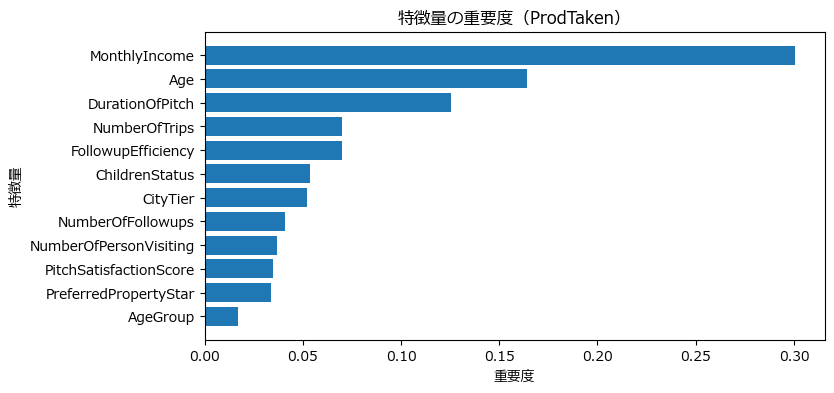

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def train_and_plot_feature_importance(df, target_column='ProdTaken', id_column='id'):
    # 特徴量とターゲットを分離
    features = df.drop(columns=[target_column, id_column])
    target = df[target_column]

    # カテゴリカルデータを数値に変換（必要に応じて）
    label_encoders = {}
    for column in features.select_dtypes(include='object').columns:
        label_encoders[column] = LabelEncoder()
        features[column] = label_encoders[column].fit_transform(features[column])

    # 数値データのみを特徴量として選択
    features = features.select_dtypes(include='number')

    # 欠損値の処理
    features = features.fillna(features.mean())

    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # ランダムフォレスト回帰モデルを訓練
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 特徴量の重要度を計算
    importances = model.feature_importances_
    feature_names = features.columns
    importance_df = pd.DataFrame({'特徴量': feature_names, '重要度': importances})
    importance_df = importance_df.sort_values(by='重要度', ascending=False)

    # 特徴量の重要度をプロット
    plt.figure(figsize=(8, 4))
    plt.barh(importance_df['特徴量'], importance_df['重要度'])
    plt.xlabel('重要度')
    plt.ylabel('特徴量')
    plt.title(f'特徴量の重要度（{target_column}）')
    plt.gca().invert_yaxis()
    plt.show()

    return model, importance_df

# 辞書型の学習データに対して、重要度の算出を適用
model, importance_df = train_and_plot_feature_importance(dfs['学習データ'], target_column='ProdTaken', id_column='id')


In [25]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# データの前処理
def preprocess_data(df, target_column=None, id_column='id'):
    if target_column:
        features = df.drop(columns=[target_column, id_column])
        target = df[target_column]
    else:
        features = df.drop(columns=[id_column])
        target = None
    return features, target

# データの分割
def split_data(features, target, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# XGBoostを用いた学習
def train_xgboost(X_train, y_train):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    return model

# モデルの評価
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"モデルの精度: {accuracy:.4f}")
    return accuracy

features, target = preprocess_data(dfs['学習データ'], target_column='ProdTaken')
X_train, X_test, y_train, y_test = split_data(features, target)
model = train_xgboost(X_train, y_train)
evaluate_model(model, X_test, y_test)
test_features, _ = preprocess_data(dfs['テストデータ'])
test_preds = model.predict(test_features)

output_df = pd.DataFrame({
    'id': dfs['テストデータ']['id'],
    'Predicted': test_preds
})

algorithm_name = "XGBoost"
output_filename = f"{algorithm_name}予測.csv"
output_df.to_csv(output_filename, index=False, header=False)
print(f"予測結果を '{output_filename}' に保存しました。")



モデルの精度: 0.8811
予測結果を 'XGBoost予測.csv' に保存しました。


c:\Users\iriku\venv\py311-gpu\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


cuda
Epoch [100/100] Train Loss: 0.2863, Train Acc: 0.8793 | Val Loss: 0.2868, Val Acc: 0.8840


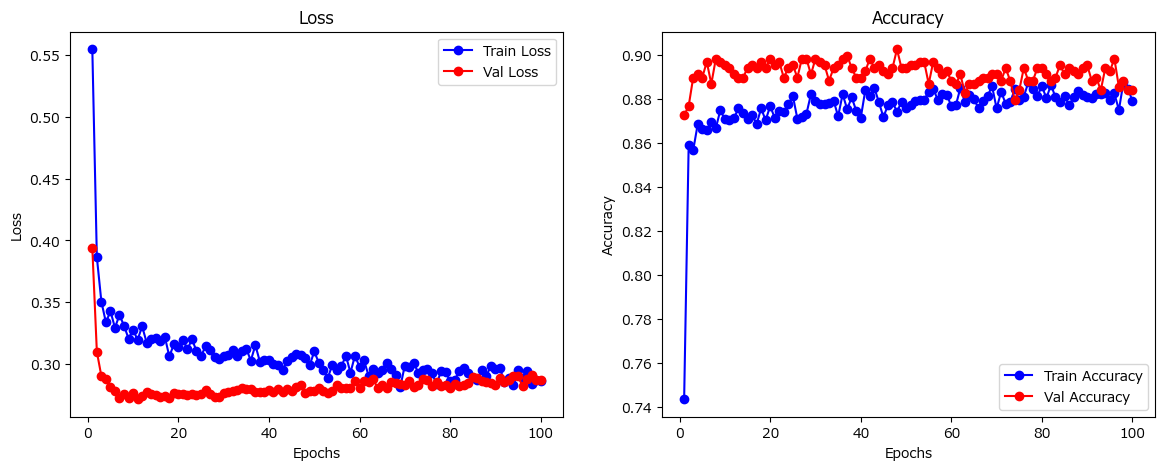

予測結果を 'DNN予測.csv' に保存しました。


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# デバイスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# データの前処理
def preprocess_data(df, target_column=None, id_column='id', scaler=None):
    if target_column:
        features = df.drop(columns=[target_column, id_column])
        target = df[target_column]
    else:
        features = df.drop(columns=[id_column])
        target = None

    # 標準化
    if scaler:
        features = scaler.fit_transform(features)

    # NumPy配列に変換
    features = np.array(features, dtype=np.float32)
    if target is not None:
        target = np.array(target, dtype=np.float32)
    
    return features, target

# データセットとデータローダの作成
def create_data_loaders(X_train, y_train, X_val, y_val, params):
    train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
    val_dataset = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))
    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)
    return train_loader, val_loader

# DNNモデルの定義
class DNN(nn.Module):
    def __init__(self, input_size, layers):
        super(DNN, self).__init__()
        net_layers = []
        current_size = input_size
        
        # 指定されたレイヤー構成に従って全結合層とPReLUを追加
        for units, dropout_rate in layers:
            net_layers.append(nn.Linear(current_size, units))
            net_layers.append(nn.BatchNorm1d(units))
            net_layers.append(nn.PReLU())
            if dropout_rate > 0:
                net_layers.append(nn.Dropout(dropout_rate))
            current_size = units
        
        # 最終層を追加（シグモイド関数で出力を0~1にスケーリング）
        net_layers.append(nn.Linear(current_size, 1))
        net_layers.append(nn.Sigmoid())
        
        self.layers = nn.Sequential(*net_layers)
    
    def forward(self, x):
        return self.layers(x)

# モデルの訓練と評価
def train_model(model, train_loader, val_loader, criterion, optimizer, params):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    num_epochs = params['num_epochs']
    
    for epoch in range(num_epochs):
        total_train_loss = 0
        total_val_loss = 0
        correct_train_predictions = 0
        correct_val_predictions = 0
        total_train_samples = 0
        total_val_samples = 0

        # 訓練データでの訓練
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).view(-1)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            preds = (outputs >= 0.5).float()  # 0.5を閾値にしてクラス分類
            correct_train_predictions += (preds == y_batch).sum().item()
            total_train_samples += y_batch.size(0)

        # 検証データでの評価
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch).view(-1)
                loss = criterion(outputs, y_batch)
                total_val_loss += loss.item()
                preds = (outputs >= 0.5).float()
                correct_val_predictions += (preds == y_batch).sum().item()
                total_val_samples += y_batch.size(0)
        
        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = correct_train_predictions / total_train_samples
        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct_val_predictions / total_val_samples

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        # プログレスバーの表示
        print(f"\rEpoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f} | "
              f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}", end="")

    # 最後に改行を追加して、次の出力が正しい位置に表示されるようにする
    print()

    return train_losses, val_losses, train_accuracies, val_accuracies

# モデルの予測
def predict(model, X_test):
    model.eval()
    with torch.no_grad():
        X_test = torch.tensor(X_test).to(device)
        predictions = model(X_test).view(-1).cpu().numpy()
        predictions = (predictions >= 0.5).astype(int)  # 0.5を閾値として分類
    return predictions

# 訓練結果をプロットする関数
def plot_results(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 5))

    # Lossのプロット
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Train Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracyのプロット
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Train Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 各種パラメータを辞書で定義
params = {
    'batch_size': 8,
    'num_epochs': 100,
    'learning_rate': 0.001,
    'layers': [
        (64, 0.5),
        # (64, 0.5),
        # (128, 0.5),
        # (256, 0.5),
        # (512, 0.5),
        # (1024, 0.5),
        # (2048, 0.5),
    ],
    'scaler': StandardScaler()
}

# 学習データを用いて実行
key = '学習データ'
test_key = 'テストデータ'

# 学習データの前処理
features, target = preprocess_data(dfs['学習データ'], target_column='ProdTaken', scaler=params['scaler'])

# データ分割
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# データローダの作成
train_loader, val_loader = create_data_loaders(X_train, y_train, X_val, y_val, params)

# モデルの初期化
model = DNN(input_size=X_train.shape[1], layers=params['layers']).to(device)
criterion = nn.BCELoss()  # バイナリクロスエントロピー
optimizer = optim.RAdam(model.parameters(), lr=params['learning_rate'])

# モデルの訓練
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, params)

# 訓練結果のプロット
plot_results(train_losses, val_losses, train_accuracies, val_accuracies)

# テストデータの前処理
test_features, _ = preprocess_data(dfs['テストデータ'], scaler=params['scaler'])

# テストデータを用いて予測
test_preds = predict(model, test_features)

# idと予測結果をCSVに保存
algorithm_name = 'DNN'
output_filename = f'{algorithm_name}予測.csv'
output_df = pd.DataFrame({
    'id': dfs['テストデータ']['id'],
    'Predicted': test_preds
})
output_df.to_csv(output_filename, index=False, header=False)
print(f"予測結果を '{output_filename}' に保存しました。")